<a href="https://colab.research.google.com/github/KISAN-DATA-ANALYST/-KISAN-DATA-ANALYST-CAL-https-colab.research.google.com-drive-1H574-M4NrVVOnpP-cqh3mZe6l3JLrw5q-/blob/main/KisanKumar_AnjuFurniture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
product_return= pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/SalesReturnTable.csv")
product_return
product_return.head()

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
4,3631,Dressers,Wrong Size,18000,18000,1


In [ ]:
total_returns= product_return.groupby("ProductName")["Returns"].sum()
total_returns

,Returns
ProductName,
Bed Frames,406
Bookcases,72
Coffee Tables,168
Desks,43
Dining Chairs,129
Dining Tables,603
Dressers,90
Mattresses,123
Nightstands,61


In [ ]:
sorted_returns=total_returns.sort_values(ascending=False)
sorted_returns

,Returns
ProductName,
Dining Tables,603
Bed Frames,406
Sofas and Couches,187
Recliners,182
Coffee Tables,168
Dining Chairs,129
Mattresses,123
Wardrobes,93
Dressers,90


In [ ]:
cumulative_sum=sorted_returns.cumsum()
cumulative_sum

,Returns
ProductName,
Dining Tables,603
Bed Frames,1009
Sofas and Couches,1196
Recliners,1378
Coffee Tables,1546
Dining Chairs,1675
Mattresses,1798
Wardrobes,1891
Dressers,1981


In [ ]:
cumulative_percentage=round(cumulative_sum/sorted_returns.sum()*100,2)
cumulative_percentage

,Returns
ProductName,
Dining Tables,27.20
Bed Frames,45.51
Sofas and Couches,53.95
Recliners,62.16
Coffee Tables,69.73
Dining Chairs,75.55
Mattresses,81.10
Wardrobes,85.30
Dressers,89.35


Text(0.5, 1.0, 'Pareto Analysis of Product Return')

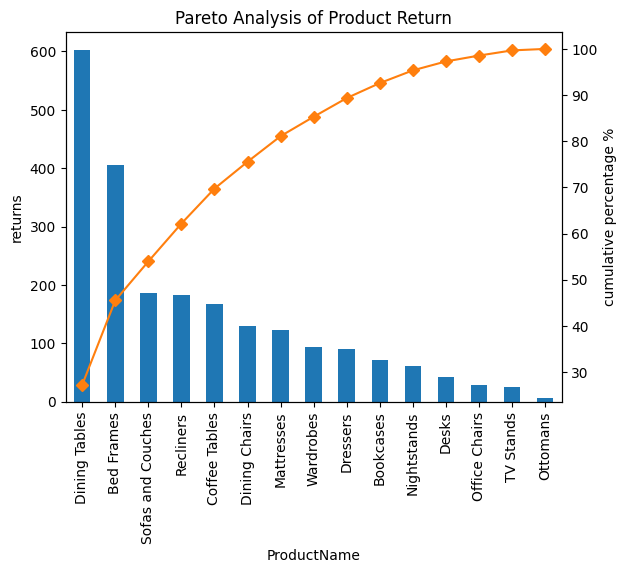

In [ ]:
fig,ax=plt.subplots()
sorted_returns.plot(kind='bar',color='C0',ax=ax)
ax.set_ylabel('returns')

ax2=ax.twinx()
cumulative_percentage.plot(kind='line',color='C1',ax=ax2,marker='D')
ax2.set_ylabel('cumulative percentage %')
plt.title('Pareto Analysis of Product Return')


In [ ]:
product_return.head()

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
4,3631,Dressers,Wrong Size,18000,18000,1


In [ ]:
Top4=product_return.query('ProductName in ["Dining Tables","Bed Frames","Sofas and Couches","Recliners"]')
Top4

,TransactionID,ProductName,Reason,Price/Unit,SalesValue,Returns
0,3627,Dining Tables,Wrong Size,30000,30000,1
1,3628,Bed Frames,Damage or Defect,20000,40000,2
2,3629,Bed Frames,Wrong Size,20000,20000,1
3,3630,Bed Frames,Damage or Defect,20000,40000,2
5,3632,Sofas and Couches,Late Delivery,50000,50000,1
...,...,...,...,...,...,...
1467,5094,Bed Frames,Damage or Defect,20000,20000,1
1468,5095,Dining Tables,Wrong Size,30000,60000,2
1469,5096,Bed Frames,Damage or Defect,20000,20000,1
1470,5097,Dining Tables,Wrong Size,30000,60000,2


In [ ]:
sorted_reasons1=Top4.groupby("Reason")["Returns"].sum().sort_values(ascending=False)
sorted_reasons1

,Returns
Reason,
Wrong Size,612
Damage or Defect,480
Comfort Issues,74
Assembly Issues,56
Poor Quality,55
Color/Style Mismatch,45
Late Delivery,34
Change of Mind,22


In [ ]:
cumulative_reason_percentage=round(sorted_reasons1.cumsum()/sorted_reasons1.sum()*100,2)
cumulative_reason_percentage

,Returns
Reason,
Wrong Size,44.41
Damage or Defect,79.25
Comfort Issues,84.62
Assembly Issues,88.68
Poor Quality,92.67
Color/Style Mismatch,95.94
Late Delivery,98.40
Change of Mind,100.00


Text(0.5, 1.0, 'Pareto Analysis of the reasons associated with returns')

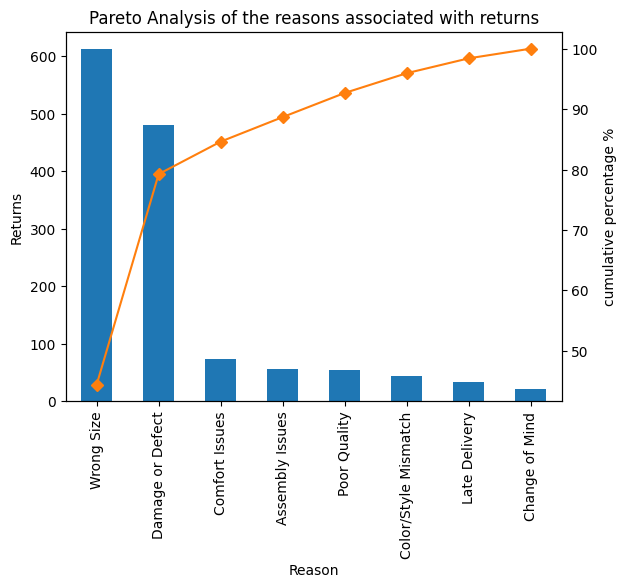

In [ ]:
fig,ax1=plt.subplots()
sorted_reasons1.plot(kind='bar',color='C0',ax=ax1)
ax1.set_ylabel('Returns')
ax2=ax1.twinx()
cumulative_reason_percentage.plot(kind='line',color='C1',ax=ax2,marker='D')
ax2.set_ylabel('cumulative percentage %')
plt.title('Pareto Analysis of the reasons associated with returns')